# White box models
* Trying to figure out what makes white-box transparent and *interpretable*.
* Intepretting simpel models, such as linear regression and decision trees.
* What GAMs (Generalized Additive Models) are, and why they can be highly predictive 
    as well as predictive.
* How to implement and interpret a GAM.
* The differences between black box models.

#### Three white box models (and a bonus)
1. Linear Regression (used within ML for Regression)
2. Decision Trees (used for regression for classification)
3. GAMs (used for regression for classification)
4. Logistic Regression -- (used for regression for classification)

These models are inherently transparent and the important charactersitics that make
them transparent:
* The algorithm being used is straightforward to understand, and we can clearly understand how an input feature is mapped to an output or target variable.
* We can identify the most important features to predict the target variable.

In [6]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
x,y = diabetes['data'], diabetes['target']

Now, create a Panas dataframe, which is a two-dimensional data structure that contains all the features and the target variable. In this case, the diabetes datasert has feature names that are not easy to understand, the six blood samples are named "s1, s2, ... s6" which is rather opaque.

In [39]:
import pandas as pd 
feature_rename = {'age': 'Age',                                 
                  'sex': 'Sex',                                 
                  'bmi': 'BMI',                                 
                  'bp': 'BP',                                   
                  's1': 'Total Cholesterol',                    
                  's2': 'LDL',                                  
                  's3': 'HDL',                                  
                  's4': 'Thyroid',                              
                  's5': 'Glaucoma',                             
                  's6': 'Glucose'}                              
 
df_data = pd.DataFrame(x,                                       
                       columns=diabetes['feature_names'])       
df_data.rename(columns=feature_rename, inplace=True)   
feature_names = list(df_data.columns.values)         
df_data['target'] = y  


Now, let's compute the pairwise correlation of columns to determine how correlated
each of the input features is with each other.

In [10]:
correlations = df_data.corr()

By default, the corr() function in pandas computes the Pearson or standard correlation coefficient. This coefficient measures the linear correlation between two variables and has a value between +1 and –1. If the magnitude of the coefficient is above 0.7, that means it’s a really high correlation. If the magnitude of the coefficient is between 0.5 and 0.7, that indicates a moderately high correlation. If the magnitude of the coefficient is between 0.3 and 0.5, that means a low correlation, and a magnitude less than 0.3 means there is little to no correlation.

[Text(0.5, 0, 'Age'),
 Text(1.5, 0, 'Sex'),
 Text(2.5, 0, 'BMI'),
 Text(3.5, 0, 'BP'),
 Text(4.5, 0, 'Total Cholesterol'),
 Text(5.5, 0, 'LDL'),
 Text(6.5, 0, 'HDL'),
 Text(7.5, 0, 'Thyroid'),
 Text(8.5, 0, 'Glaucoma'),
 Text(9.5, 0, 'Glucose'),
 Text(10.5, 0, 'target')]

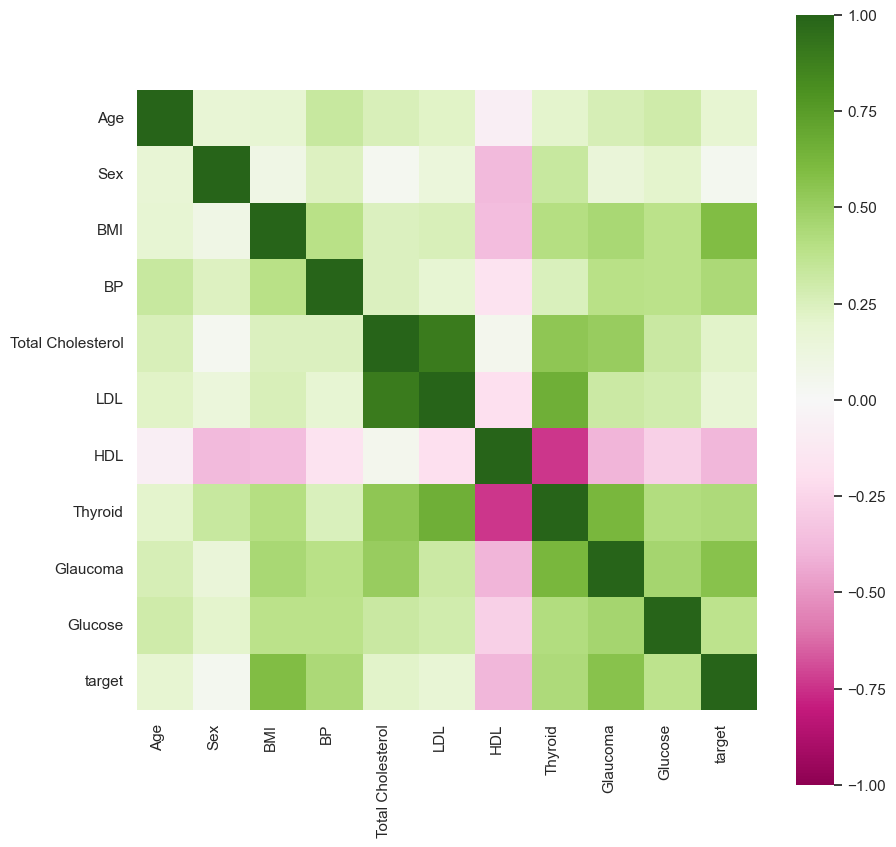

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# seaborn is used to create a heatmap
sns.set(style='whitegrid')
sns.set_palette('bright')

f, ax = plt.subplots(figsize=(10,10))
sns.heatmap( correlations,
             vmin=-1, vmax=1, center=0,
             cmap="PiYG",
             square=True,
             ax=ax)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=90,
    horizontalalignment='right'
)




So, BMI, Glaucoma, Glucose, BP certainly are moderately to highly correlated with the "target" (which, is the progression of diabetes).
A few others, such as Total cholesterol, Glucose are also correlated positively, where as HDL is highly correlated negatively.

## Linear Regression

This is one of the simplest models that can be trained for regression tasks. It's just a sum of all weights formulation:

f(x1, x2, x3, ... xn) = weight_0 + for (i=1, ... i=n) { weight_i * xi }

Where determining the weights is done through, usually a closed form solution such as Newton equation (?), or
Gradient descent method (which is very commonly used). GD scales well.


In [16]:
from sklearn.model_selection import train_test_split            
from sklearn.linear_model import LinearRegression               
import numpy as np  

# split the data into training and test sets, using 80% of the data for training and 20%
# for testing, as well as setting the random 'state' to something we can reproduce.
X_train, X_test, y_train, y_test = train_test_split(x, y,       
    test_size=0.2,                                                
    random_state=42) 

linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train, y_train)
# make some predictions
y_pred = linear_regression_model.predict(X_test)
# evalute the model using the "MEA -- mean absolute error" metric
mae = np.mean( np.abs( y_test - y_pred) )
print("Mean absolute erorr: ", mae)

Mean absolute erorr:  42.794094679599944


So... is 42.8 any good? 

To determine that we need a baseline. In this case, the baseline model was 62.2, we had a 
drop of almost 20.

In [34]:
import math
from sklearn.metrics import mean_squared_error
# Baseline performance 
y_base = np.median(y_test)
base_mae = np.mean( np.abs(y_test - y_base))
print("Baseline performance (via mae): %4.2f" % (base_mae))

rmse = math.sqrt(mean_squared_error(y_test, [y_base for _ in range(len(y_test))]))
print("RMSE for the baseline is %4.2f" % rmse)

mape = np.mean(np.abs(y_test - y_base) / y_test ) * 100
print("MAPE for baseline is %4.2f" % mape)

Baseline performance (via mae): 62.21
RMSE for the baseline is 74.70
MAPE for baseline is 51.59


In [24]:
baseline_mae = 62.2
change_in_mae = 100 * np.abs( baseline_mae - mae) / max( baseline_mae, mae)
print("The change in the model is %4.2f percent" % (change_in_mae))

The change in the model is 31.20 percent


This is a pretty good improvement, the error has been reduced by almost a third. However,
we don't have any real sense of how the model arrived at this prediction, or which
features are important. 

There are other measures, such as Root Mean Squared Error, RSME, and also 
Mean Absolute Percentage Error, MAPE. MAPE is expressed in a percentage, and
so gives more context (which is what I did above).

In short, we want something more interpretable!

In [37]:
# Fully evaluating our LR Model
mae = np.mean(np.abs(y_test - y_pred))
print("The Linear Regression model MAE performacne is %4.2f" % mae)

rmse = math.sqrt(mean_squared_error(y_test, y_pred))
print("The RMSE of the Linear Regression model is %4.2f" % rmse)

mape = np.mean(np.abs(y_test - y_pred) / y_test) * 100
print("The Linear Regression model MAPE is %4.2f" % mape)


The Linear Regression model MAE performacne is 42.79
The RMSE of the Linear Regression model is 53.85
The Linear Regression model MAPE is 37.50


In [42]:
# Let's interpret the Linear Regression Model
print(feature_names)

weights = linear_regression_model.coef_
feature_importance_idx = np.argsort(np.abs(weights))[::-1]
feature_importance = [feature_names[idx] for idx in feature_importance_idx]


['Age', 'Sex', 'BMI', 'BP', 'Total Cholesterol', 'LDL', 'HDL', 'Thyroid', 'Glaucoma', 'Glucose']


NameError: name 'feature_importance' is not defined